## Why is my bus always late ? 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
bus_times = pd.read_csv('data/seattle_bus_times_NC.txt')

In [25]:
bus_times.head()

,route,direction,scheduled,actual,minutes_late,day_of_week,time_of_day,am_pm
0,C,2016-03-26 06:30:28,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.400000,Saturday,06,AM
1,C,2016-03-26 01:05:25,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333,Saturday,01,AM
2,C,2016-03-26 21:00:25,2016-03-26 21:00:25,2016-03-26 21:05:00,4.583333,Saturday,21,PM
3,C,2016-03-26 22:30:25,2016-03-26 22:30:25,2016-03-26 22:34:28,4.050000,Saturday,22,PM
4,C,2016-03-26 20:15:25,2016-03-26 20:15:25,2016-03-26 20:23:39,8.233333,Saturday,20,PM


1. Group by time of day and find the counts
2. Group by the route and find the counts
3. Group by the direction and plot a graph of direction counts
4. Find the most late direction
5. Find the most late route
6. Find the day that has the most latest times

In [7]:
bus_times['direction'] = pd.to_datetime(bus_times['scheduled'])
bus_times['actual'] = pd.to_datetime(bus_times['actual'])

In [18]:
bus_times['day_of_week'] = pd.to_datetime(bus_times['actual']).dt.strftime('%A')

In [20]:
bus_times['time_of_day'] = pd.to_datetime(bus_times['actual']).dt.strftime('%H')

In [23]:
bus_times['am_pm'] = pd.to_datetime(bus_times['actual']).dt.strftime('%p')

In [24]:
bus_times

,route,direction,scheduled,actual,minutes_late,day_of_week,time_of_day,am_pm
0,C,2016-03-26 06:30:28,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.400000,Saturday,06,AM
1,C,2016-03-26 01:05:25,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333,Saturday,01,AM
2,C,2016-03-26 21:00:25,2016-03-26 21:00:25,2016-03-26 21:05:00,4.583333,Saturday,21,PM
3,C,2016-03-26 22:30:25,2016-03-26 22:30:25,2016-03-26 22:34:28,4.050000,Saturday,22,PM
4,C,2016-03-26 20:15:25,2016-03-26 20:15:25,2016-03-26 20:23:39,8.233333,Saturday,20,PM
...,...,...,...,...,...,...,...,...
1429,C,2016-04-10 13:15:28,2016-04-10 13:15:28,2016-04-10 13:11:36,-3.866667,Sunday,13,PM
1430,C,2016-04-10 10:45:28,2016-04-10 10:45:28,2016-04-10 10:40:56,-4.533333,Sunday,10,AM
1431,C,2016-04-10 06:15:28,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.850000,Sunday,06,AM
1432,C,2016-04-10 17:00:28,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.566667,Sunday,16,PM


<Axes: xlabel='day_of_week', ylabel='minutes_late'>

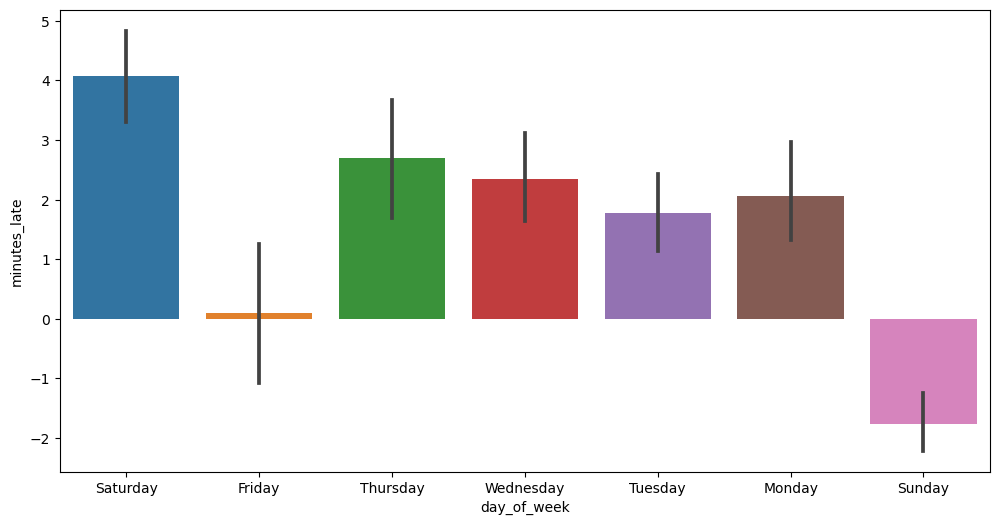

In [35]:
fig, ax  = plt.subplots(1, figsize=(12,6))
sns.barplot(bus_times,x='day_of_week',y='minutes_late', ax=ax)

Group the dataset into : 
    Late, On time and early

In [ ]:
bus_times['arrival_group'] = bus_times